In [9]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

In [10]:
X,y = make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=20)

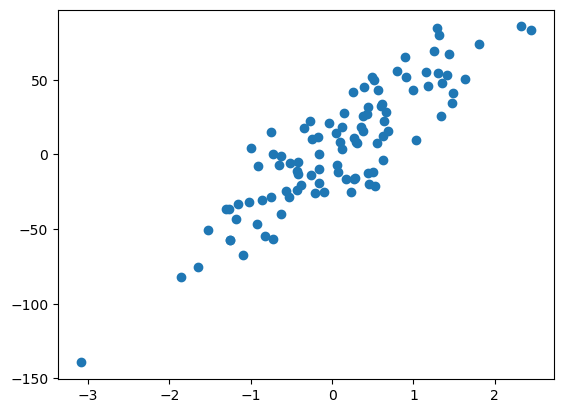

In [11]:
plt.scatter(X,y)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
lr = LinearRegression()

In [18]:
lr.fit(X_train,y_train)

LinearRegression()

In [19]:
print(lr.coef_,'value of slop (m)')
print(lr.intercept_ ,'value of b ')

[37.11662145] value of slop (m)
3.495701634073713 value of b 


In [20]:
y_pred = lr.predict(X_test)

In [21]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7647630784056374

In [22]:
class meraGD:
    def __init__(self,learning_rate,epochs):
        self.m = 100
        self.b = -120
        self.learning_rate = learning_rate
        self.epochs = epochs

    def fit(self,X,y):
        for i in range(self.epochs):
            loss_slop_b = -2*np.sum(y - self.m*X.ravel()-self.b)
            loss_slop_m = -2*np.sum((y - self.m*X.ravel()-self.b)*X.ravel())
            self.b = self.b - (self.learning_rate * loss_slop_b)
            self.m = self.m - (self.learning_rate * loss_slop_m)

        print(self.m,self.b)

    def predict(self,X):
        return self.m * X + self.b
        

In [30]:
mera = meraGD(learning_rate=0.01,epochs=80)

In [31]:
mera.fit(X_train,y_train)

37.11662144176336 3.4957016275360657


In [32]:
y_pred = mera.predict(X_test)

In [33]:
r2_score(y_test,y_pred)

0.7647630784718482